<a href="https://colab.research.google.com/github/vishnuprasad2004/machine-learning/blob/main/Linear_Regression_without_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression without Sklearn

### What is Linear Regression?

Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features. When the number of the independent feature, is 1 then it is known as Univariate Linear regression, and in the case of more than one feature, it is known as multivariate linear regression.
Here I implemented the model without using the predefined package **sklearn**.

### Formula to calculate the slope/weight (w)

>$$w = \frac{\sum_{i=0}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=0}^n(x_i-\bar{x})^2} $$

### Formula to calculate the intercept (b)

>$$b = \bar{y} - w\bar{x}$$

### The cost function formula:

>$$J\left( w,b \right) = \frac{1}{2n} \sum_{i=1}^n \bigg(f \left(x_i \right) - \hat{y_i} \bigg)^2$$

### R² score formula (coefficient of determination)

>$$R^2 = 1 - \frac{\sum_{i=0}^n(y_i - \hat{y_i})^2}{\sum_{i=0}^n(y_i - \bar{y})^2}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.corr()

In [ ]:
X = np.array(df["Hours"])
Y = np.array(df["Scores"])
X,Y

(array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
        3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [ ]:
class LinearRegression:
  def __init__(self):
    self.params = {"w":0,"b":0}
    self.values = {}

  def fit(self, X,Y):
    self.values["x"] = X
    self.values["y"] = Y

  def train(self):
    x = self.values["x"]
    y = self.values["y"]
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    dx = x - x_mean
    dy = y - y_mean
    nr = np.sum((dx * dy))
    dr = np.sum(dx ** 2)
    w = nr/dr
    b = y_mean - w * x_mean
    print(f"Calculated w(slope) and b(intercept) values =>  w = {w} and b = {b}")
    self.params["w"] = w
    self.params["b"] = b
    pred_y = w * x + b
    self.values["pred_y"] = pred_y

  def predict(self,x):
    pred_y = x * self.params["w"] + self.params["b"]
    print(f"Predicted Value:{pred_y}")
    return pred_y

  def r2_score(self):
    pred_y = self.values["pred_y"]
    r2_score = 1 - (np.sum(np.square(self.values["y"] - pred_y)) / np.sum(np.square(self.values["y"] - np.mean(self.values["y"]))))
    print("R2 Score",r2_score)
    return r2_score

  def cost_function(self):
    pred_y = self.values["pred_y"]
    deviation = pred_y - self.values["y"]
    cost_value = np.sum(np.square(deviation))/(2*len(self.values["x"]))
    print("Cost function value:", cost_value)
    return cost_value

  def get_pred_y_values(self):
    return self.values["pred_y"]

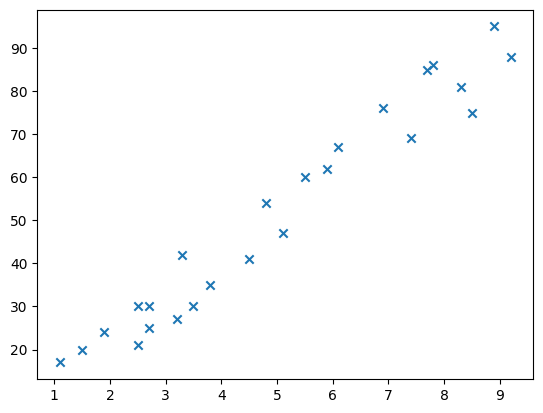

<Figure size 6.4x2 with 0 Axes>

In [51]:
plt.scatter(X,Y,marker="x")
plt.figure(dpi=1).set_figheight(2)
plt.show()

In [ ]:
reg = LinearRegression()
reg.fit(X,Y)
reg.train()
pred_Y = reg.get_pred_y_values()
reg.params,reg.values

Calculated w(slope) and b(intercept) values =>  w = 9.775803390787473 and b = 2.4836734053731817


({'w': 9.775803390787473, 'b': 2.4836734053731817},
 {'x': array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
         3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]),
  'y': array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
         24, 67, 69, 30, 54, 35, 76, 86]),
  'pred_y': array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
         17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
         77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
         89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
         28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])})

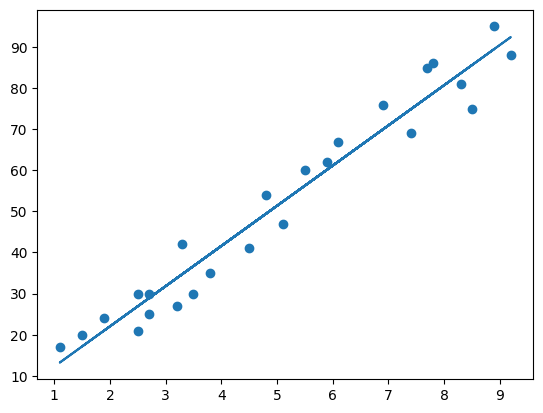

R2 Score 0.9529481969048356
Cost function value: 14.441365254622731


14.441365254622731

In [ ]:
plt.plot(X,pred_Y)
plt.scatter(X,Y)
plt.show()
reg.r2_score()
reg.cost_function()

Now we know how to implement LR through calculation in numpy


Implemented by Vishnu Prasad Korada